## $u_k$ expression for iGOGM-a

$u_k = \frac{A_k(1+2\alpha_{k+1})(A_k+2\alpha_k\alpha_{k+1})}{4LA_K(A_{k+1}-\alpha_{k+1}^2)}+ \sum_{i=k+1}^{K-1} \frac{A_i(1+2\alpha_{i+1})\alpha_k\alpha_{i+1}}{2L A_K(A_{i+1}- \alpha_{i+1}^2)}$

In [1]:
from sympy import *
init_printing()  # for nice printing

K = symbols('K', positive=True,integer=True)
i,j,k=symbols('i j k',cls=Idx)  # index number

a = symbols('a',positive=True)
L = symbols('L',positive=True) # Lipschitz number
def A(k):
    if k == -1:
        return 0
    else :
        return(k+2*a)*(k+1)/(2*a)

def func_u(k):
    uk = A(k)*(1+2*(A(k+1)-A(k)))*(A(k)+2*(A(k)-A(k-1))*(A(k+1)-A(k)))/(4 * L *A(K) * (A(k+1)-(A(k+1)-A(k))**2)) + Sum(A(k)*(1+2*(A(k+1)-A(k)))*(A(k)-A(k-1))*(A(k+1)-A(k))/ (2 * L * A(K) *(A(k+1)-(A(k+1)-A(k))**2)), (k, k+1, K-1))

    return uk


### calculate $\frac{A_k(1+2\alpha_{k+1})(A_k+2\alpha_k\alpha_{k+1})}{4LA_K(A_{k+1}-\alpha_{k+1}^2)}$

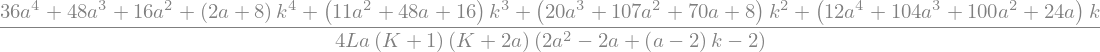

In [2]:
u_const=A(k)*(1+2*(A(k+1)-A(k)))*(A(k)+2*(A(k)-A(k-1))*(A(k+1)-A(k)))/(4 * L *A(K) * (A(k+1)-(A(k+1)-A(k))**2))
u_const=u_const.cancel().factor()
u_const=u_const.expand(numer=True).collect(k)
u_const

### calculate $\frac{A_i(1+2\alpha_{i+1})\alpha_k\alpha_{i+1}}{2L A_K(A_{i+1}- \alpha_{i+1}^2)}$

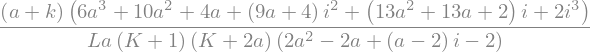

In [4]:
u_sum=A(i)*(1+2*(A(i+1)-A(i)))*(A(k)-A(k-1))*(A(i+1)-A(i))/ (2 * L * A(K) *(A(i+1)-(A(i+1)-A(i))**2))
u_sum=u_sum.cancel().factor()
u_sum=(u_sum/(a+k)).expand(numer=True).collect(i)*(a+k)
u_sum

## uk for iGOGM-4

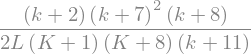

In [9]:
u_const=u_const.subs(a,4).cancel().factor()
u_const

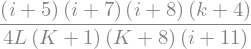

In [10]:
u_sum=u_sum.subs(a,4).cancel().factor()
u_sum

## replace terms in denominators

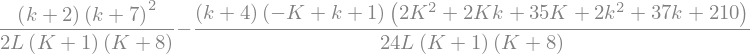

In [14]:
uk=u_const * (k+11) / (k+8) + Sum(u_sum * (i+11) / (i+8),(i,k+1,K-1)).doit().simplify().factor()
uk

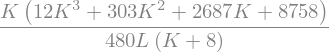

In [15]:
Sum(uk,(k,0,K-1)).doit().simplify().factor()

## Numerical solution for different a values

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import itertools

plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "sans-serif",
        "font.sans-serif": ["Helvetica"],
        "ps.usedistiller": "xpdf",
    }
)

markers = [
    "o",
    "s",
    "D",
    "^",
    "v",
    "<",
    ">",
    "p",
    "*",
    "h",
    "H",
    "+",
    "x",
    "d",
    "|",
    "_",
]
marker_cycle = itertools.cycle(markers)


def compute_u_OGM_a(a_val, K, L=1):
    A_val = np.zeros(K + 2)  # Pre-allocate array for A values
    alpha_val = np.zeros(K + 1)  # Pre-allocate array for alpha values
    u = np.zeros(K)  # Pre-allocate array for u values

    A_val[0] = 1
    alpha_val[0] = 1

    for ite in range(1, K + 1):
        alpha_val[ite] = (ite + a_val) / a_val
        # alpha_val[ite] = 1
        A_val[ite] = A_val[ite - 1] + alpha_val[ite]

    A_val[K + 1] = 0  # A(K+1) = 0

    for ite in range(K):
        sum_term = 0
        for j in range(ite + 1, K):
            sum_term += (
                A_val[j]
                * (1 + 2 * alpha_val[j + 1])
                * alpha_val[ite]
                * alpha_val[j + 1]
                / (2 * L * A_val[K] * (A_val[j + 1] - alpha_val[j + 1] ** 2))
            )

        u[ite] = (
            A_val[ite]
            * (1 + 2 * alpha_val[ite + 1])
            * (A_val[ite] + 2 * alpha_val[ite] * alpha_val[ite + 1])
            / (4 * L * A_val[K] * (A_val[ite + 1] - alpha_val[ite + 1] ** 2))
            + sum_term
        )

    u_sum = np.sum(u)
    tau = L / (4 * A_val[K])

    result = {
        "a": a_val,
        "A_seq": A_val.tolist(),
        "u_seq": u.tolist(),
        "u_sum": u_sum,
        "tau": tau,
        "K": K,
        "L": L,
    }
    return result

In [2]:
a_values = np.linspace(4, 50, num=5, dtype=int).tolist()
a_values.insert(0, 2.1)
K_values = [100, 1000]
combinations = itertools.product(a_values, K_values)
results = {idx: compute_u_OGM_a(a, K) for idx, (a, K) in enumerate(combinations)}

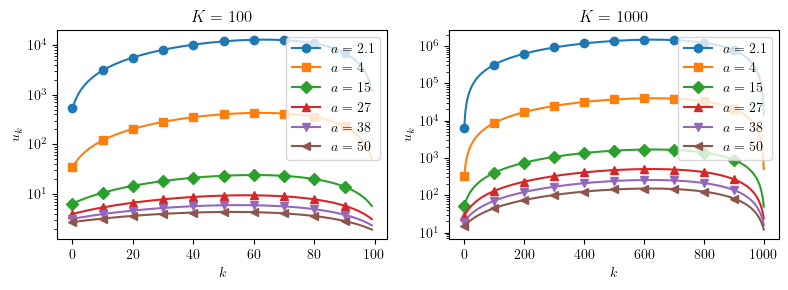

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
# Plot for K=100
marker_cycle = itertools.cycle(markers)
for idx, result in results.items():
    if result["a"] in a_values and result["K"] == 100:
        axs[0].plot(
            result["u_seq"],
            label=rf'$a={{{result["a"]}}}$',
            marker=next(marker_cycle),
            markevery=10,
        )
        axs[0].set_yscale("log")
        axs[0].legend(loc="upper right")
        axs[0].set_title(r"$K=100$")

# Plot for K=1000
marker_cycle = itertools.cycle(markers)

for idx, result in results.items():
    if result["a"] in a_values and result["K"] == 1000:
        axs[1].plot(
            result["u_seq"],
            label=rf'$a={{{result["a"]}}}$',
            marker=next(marker_cycle),
            markevery=100,
        )
        axs[1].set_yscale("log")
        axs[1].legend(loc="upper right")
        axs[1].set_title(r"$K=1000$")


# Set common labels
for ax in axs:
    ax.set_xlabel(r"$k$")
    ax.set_ylabel(r"$u_k$")

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("Figures/uk_vs_a_K.pdf", bbox_inches="tight")

In [53]:
a_values = np.append([2.1, 4], np.logspace(2, 6, num=5)).tolist()
K_values = np.logspace(1, 4, num=10, dtype=int).tolist()
combinations = itertools.product(a_values, K_values)

results = {}
for idx, (a, K) in enumerate(combinations):
    results[idx] = compute_u_OGM_a(a, K)
    print("finish" + str(idx))

# save the results
with open("u_vs_a_K.pkl", "wb") as f:
    pickle.dump(results, f)

finish0
finish1
finish2
finish3
finish4
finish5
finish6
finish7
finish8
finish9
finish10
finish11
finish12
finish13
finish14
finish15
finish16
finish17
finish18
finish19
finish20
finish21
finish22
finish23
finish24
finish25
finish26
finish27
finish28
finish29
finish30
finish31
finish32
finish33
finish34
finish35
finish36
finish37
finish38
finish39
finish40
finish41
finish42
finish43
finish44
finish45
finish46
finish47
finish48
finish49
finish50
finish51
finish52
finish53
finish54
finish55
finish56
finish57
finish58
finish59
finish60
finish61
finish62
finish63
finish64
finish65
finish66
finish67
finish68
finish69


In [52]:
with open("u_vs_a_K.pkl", "rb") as f:
    results = pickle.load(f)
len(results)

210

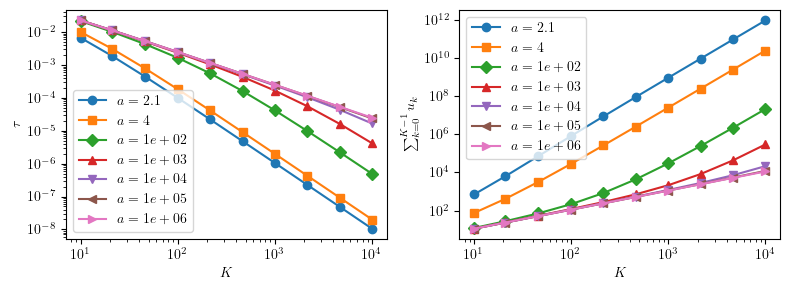

In [62]:
a_values = np.append([2.1, 4], np.logspace(2, 6, num=5)).tolist()
K_values = np.logspace(1, 4, num=10, dtype=int).tolist()
# load the results
with open("u_vs_a_K.pkl", "rb") as f:
    results = pickle.load(f)

# extract u_sum for each a
sum_u_values = np.zeros((len(K_values), len(a_values)))
tau_values = np.zeros((len(K_values), len(a_values)))
for idx, result in results.items():

    K_idx = K_values.index(result["K"])
    a_idx = a_values.index(result["a"])
    sum_u_values[K_idx, a_idx] = result["u_sum"]
    tau_values[K_idx, a_idx] = result["tau"]


fig, ax = plt.subplots(1, 2, figsize=(8, 3))


marker_cycle = itertools.cycle(markers)
for a_idx, a in enumerate(a_values):
    if a == 2.1:
        lable_text = rf"$a={{{a}}}$"
    elif a <= 10:

        lable_text = rf"$a={{{int(a)}}}$"
    else:
        lable_text = rf"$a={{{a:.0e}}}$"

    ax[0].plot(
        K_values,
        tau_values[:, a_idx],  # Adjust the index for sum_u_values
        label=lable_text,
        marker=next(marker_cycle),
        markevery=1,
    )
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].legend(loc="lower left")
ax[0].set_xlabel(r"$K$")
ax[0].set_ylabel(r"$\tau$")

marker_cycle = itertools.cycle(markers)

for a_idx, a in enumerate(a_values):
    if a == 2.1:
        lable_text = rf"$a={{{a}}}$"
    elif a <= 10:

        lable_text = rf"$a={{{int(a)}}}$"
    else:
        lable_text = rf"$a={{{a:.0e}}}$"
    ax[1].plot(
        K_values,
        sum_u_values[:, a_idx],  # Adjust the index for sum_u_values
        label=lable_text,
        marker=next(marker_cycle),
        markevery=1,
    )

ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].legend(loc="upper left")
ax[1].set_xlabel(r"$K$")
ax[1].set_ylabel(r"$\sum_{k=0}^{K-1} u_k$")


plt.tight_layout()
plt.savefig("Figures/tau_u_vs_a_K.pdf", bbox_inches="tight")